## Model Test

In [10]:
import torch
import torchvision.transforms as transforms               # include image preprocess tools
from torchvision.datasets import CIFAR10        # for loading images from Pytorch CIFAR
from torch.utils.data import DataLoader
import detectors
import timm
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter
from src.temperature_scaling import ModelWithTemperature

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load fine-tuned model
model = timm.create_model("vgg16_bn_cifar10", pretrained=True)
model = model.to(device)

# reprocess the images from CIFAR
data_transform = transforms.Compose([
    transforms.ToTensor(),          # transfer to tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # normalize
])
# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.0).to(device)
model.set_temperature(temp_scal_loader)

model.eval()

Files already downloaded and verified
Before temperature - NLL: 0.413, ECE: 0.062
Optimal temperature: 4.903
After temperature - NLL: 0.917, ECE: 0.470


ModelWithTemperature(
  (model): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, pa

APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4931 ± 0.0031
Final Average Prediction Set Size: 1.40 ± 0.02
Final Average Coverage: 0.9493 ± 0.0030
Final Average Real Probability: 0.9219 ± 0.0030


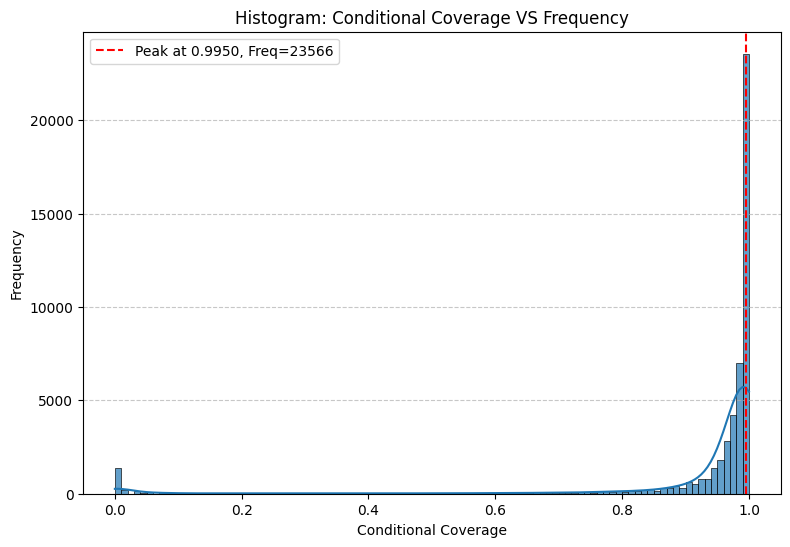

23566 (47.13%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs=10, alpha=0.05, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5004 ± 0.0039
Final Average Prediction Set Size: 1.43 ± 0.03
Final Average Coverage: 0.9500 ± 0.0041
Final Average Real Probability: 0.9226 ± 0.0044


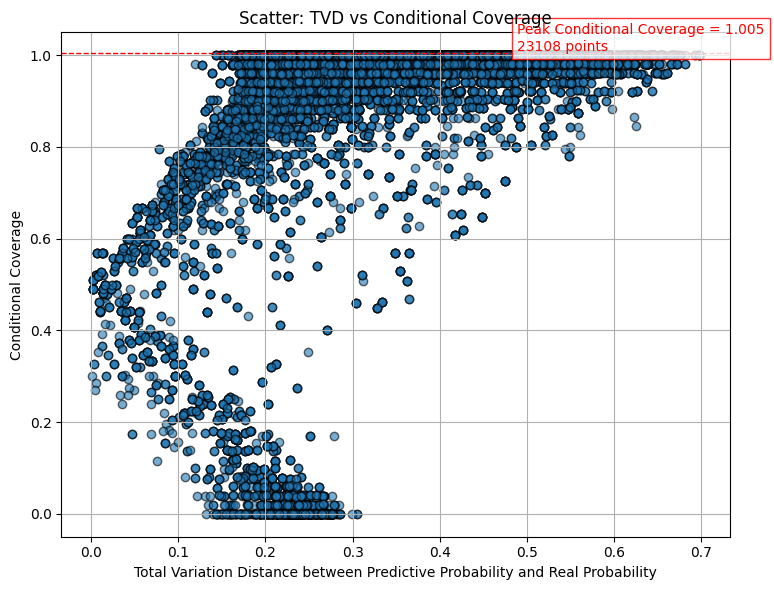

Peak Conditional Coverage = 1.005, with 23108 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
No points are found in this region.

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.22603', '0.12381', '0.11146', '0.10276']
  Real Probability Set      : ['0.00000', '0.00000', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.45177']
  Real Probability Set      : ['0.00000']
Sample 3:
  Predictive Probability Set: ['0.21922', '0.13604', '0.12577']
  Real Probability Set      : ['0.00000', '0.00000', '0.05882']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.24339', '0.12484', '0.10953', '0.10014']
  Real Probability Set      : ['0.07692', '0.19231', '0.42308', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.28590', '0.21828']
  Real Probability Set      : ['0.01961', '0.68627']
Sample 3:
  Predictive Probability Set: ['0.29354', '0.24543']
  Rea

In [11]:
aps_cifar10h_scatter(model, dataset, device, num_runs=10, alpha=0.05)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5134 ± 0.0048
Final Average Prediction Set Size: 1.30 ± 0.03
Final Average Coverage: 0.9510 ± 0.0036
Final Average Real Probability: 0.9222 ± 0.0042


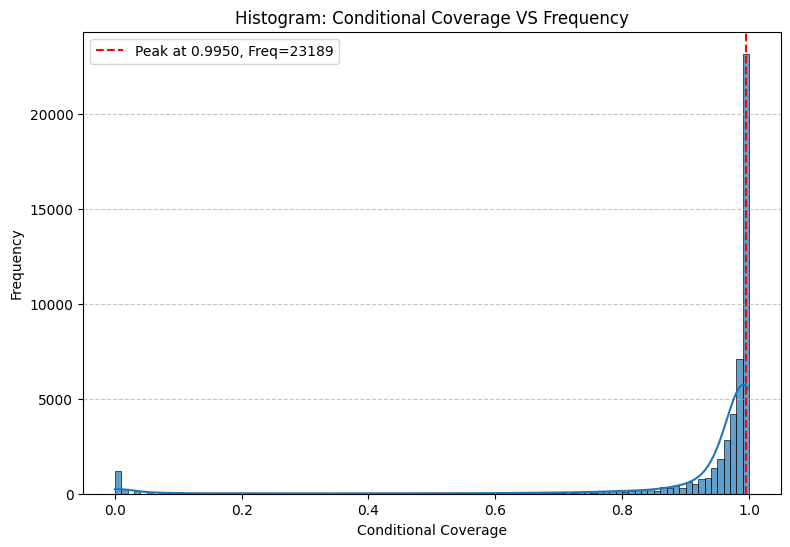

23189 (46.38%) samples reached the peak conditional coverage at 0.9950


In [13]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.03, k_reg=1, num_runs=10, alpha=0.05, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5134 ± 0.0048
Final Average Prediction Set Size: 1.30 ± 0.03
Final Average Coverage: 0.9510 ± 0.0036
Final Average Real Probability: 0.9222 ± 0.0042


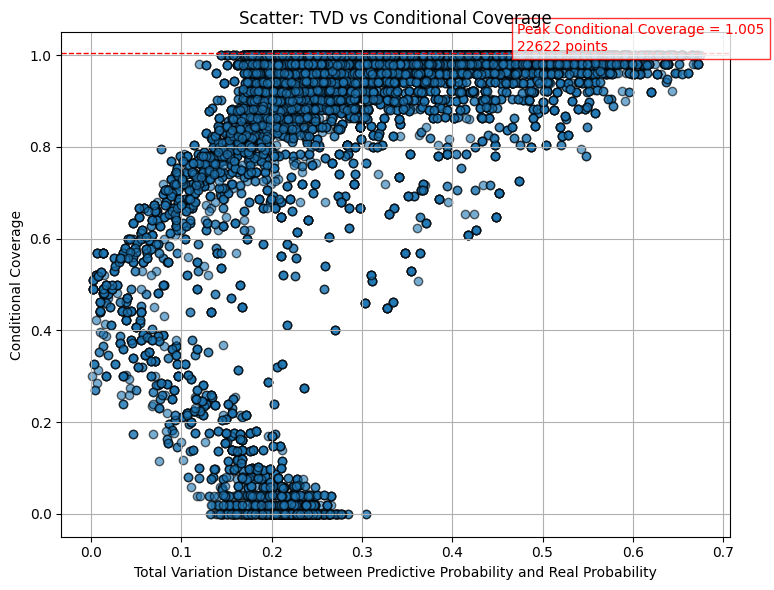

Peak Conditional Coverage = 1.005, with 22622 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
No points are found in this region.

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.21817', '0.13424', '0.13080']
  Real Probability Set      : ['0.00000', '0.00000', '0.01923']
Sample 2:
  Predictive Probability Set: ['0.31404', '0.12081', '0.09270']
  Real Probability Set      : ['0.00000', '0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.52151']
  Real Probability Set      : ['0.10000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.46421', '0.09804']
  Real Probability Set      : ['0.09615', '0.55769']
Sample 2:
  Predictive Probability Set: ['0.29354', '0.24543']
  Real Probability Set      : ['0.01923', '0.67308']
Sample 3:
  Predictive Probability Set: ['0.40674', '0.14436']
  Real Probability Set      : ['0.01961', '0.70588']

--- Region 4: hig

In [12]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.03, k_reg=1, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5527 ± 0.0070
Final Average Prediction Set Size: 1.27 ± 0.02
Final Average Coverage: 0.9520 ± 0.0032
Final Average Real Probability: 0.9233 ± 0.0033


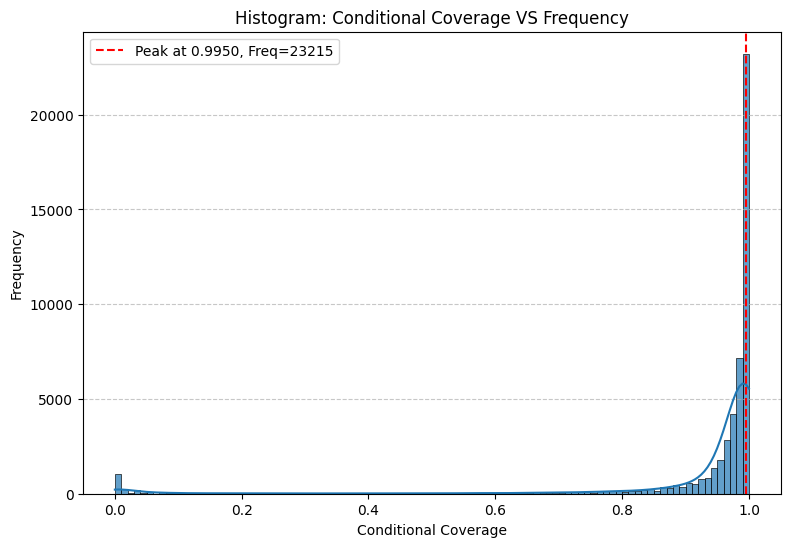

23215 (46.43%) samples reached the peak conditional coverage at 0.9950


In [15]:
saps_cifar10h_hist(model, dataset, device, lambda_=0.35, num_runs=10, alpha=0.05, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5527 ± 0.0070
Final Average Prediction Set Size: 1.27 ± 0.02
Final Average Coverage: 0.9520 ± 0.0032
Final Average Real Probability: 0.9233 ± 0.0033


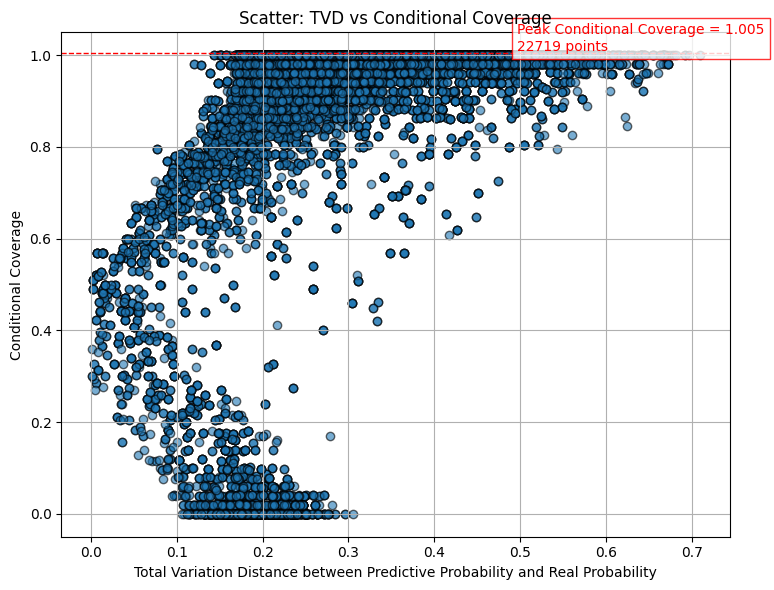

Peak Conditional Coverage = 1.005, with 22719 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
No points are found in this region.

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.23610', '0.23496']
  Real Probability Set      : ['0.00000', '0.03922']
Sample 2:
  Predictive Probability Set: ['0.39400', '0.10387']
  Real Probability Set      : ['0.00000', '0.01961']
Sample 3:
  Predictive Probability Set: ['0.41556']
  Real Probability Set      : ['0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.26296', '0.14852']
  Real Probability Set      : ['0.00000', '0.50877']
Sample 2:
  Predictive Probability Set: ['0.23287', '0.22857']
  Real Probability Set      : ['0.00000', '0.78431']
Sample 3:
  Predictive Probability Set: ['0.22681', '0.22190']
  Real Probability Set      : ['0.00000', '0.65455']

--- Region 4: high TVD, high Coverage ---
Sample 1:
  Predict

In [14]:
saps_cifar10h_scatter(model, dataset, device, lambda_=0.35, num_runs=10, alpha=0.05)